In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy.signal import savgol_filter

from astropy.constants import c

import matplotlib
from matplotlib.ticker import MultipleLocator

In [2]:
print('NumPy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))

NumPy version: 1.19.2
pandas version: 1.1.3
matplotlib version: 3.3.2


In [3]:
%matplotlib notebook

In [4]:
# SN metadata

z = 0.0307
t_max = 2458986.91
t_max_mjd = t_max - 2400000.5

In [5]:
def plot_box_spec(wave, flux): 
    flux_plot = np.repeat(flux, 2)
    wv_plot = wave.copy()
    wv_plot[:-1] += np.diff(wave)/2
    wv_plot = np.append(wave[0]-(wave[1]-wave[0])/2, 
                        np.append(np.repeat(wv_plot[0:-1], 2), 
                                  wave[-1]+(wave[-1]-wave[-2])/2))
    
    return wv_plot, flux_plot

In [6]:
nir_spec = pd.read_csv('../data/spectroscopy/SN2020jgb_20200609_fluxCal.txt',
                       delim_whitespace=True, names=['wave','flux'])

keck_spec = pd.read_csv('../data/spectroscopy/ZTF20aayhacx_20200623_Keck1_v1.ascii',
                        delim_whitespace=True, comment='#', header=None)

In [7]:
plus23_12fr = pd.read_csv('../data/comp_sne/SN2012fr_2012-12-05_05-59-29_ESO-NTT_Sofi_PESSTO-SSDR.ascii',
                          delim_whitespace=True, header=None)
plus40_12fr = pd.read_csv('../data/comp_sne/SN2012fr_2012-12-22_04-24-24_ESO-NTT_Sofi_PESSTO-SSDR.ascii',
                          delim_whitespace=True, header=None)

In [8]:
lm_21dat = pd.read_csv('../data/models/Boyle17/LM_recomb_21.dat', 
                       header=None)

<IPython.core.display.Javascript object>


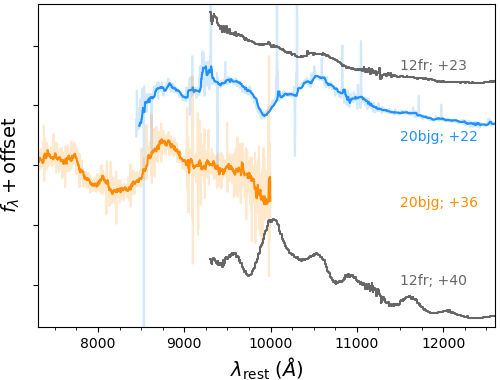

In [10]:
fig, ax = plt.subplots(figsize=(5,3.8))

# GNIRS
wv, fl = plot_box_spec(nir_spec['wave'].values, nir_spec['flux'].values)
Jband = np.where((wv < 23600) & (wv > 6000))
norm_flux = norm_flux = np.median(fl[np.where((wv > 9400) & (wv < 9600))])
ax.plot(wv[Jband]/(1+z), 
        fl[Jband]/norm_flux + 1.5, 
        alpha=0.2, color='DodgerBlue')
ax.plot(wv[Jband]/(1+z), 
        pd.Series(fl[Jband]/norm_flux).rolling(35).median().values + 1.5, 
        color='DodgerBlue')

# Keck
wv, fl = plot_box_spec(keck_spec[0].values, keck_spec[1].values)
norm_flux = norm_flux = np.median(fl[np.where((wv > 9400) & (wv < 9600))])
ax.plot(wv/(1+z), fl/norm_flux, 
        alpha=0.2, color='DarkOrange')
ax.plot(wv/(1+z), 
        pd.Series(fl/norm_flux).rolling(35).median().values, 
        color='DarkOrange')

# 12fr +23 d
z_12fr = 0.005476
wv, fl = plot_box_spec(plus23_12fr[0].values, plus23_12fr[1].values)
norm_flux = np.median(fl[np.where((wv > 9400) & (wv < 9600))])
ax.plot(wv/(1+z_12fr), fl/norm_flux + 2.3, 
        color='0.4')
# 12fr +40 d
wv, fl = plot_box_spec(plus40_12fr[0].values, plus40_12fr[1].values)
norm_flux = np.median(fl[np.where((wv > 9400) & (wv < 9600))])
ax.plot(wv/(1+z_12fr), fl/norm_flux - 1.6, 
        color='0.4')

# # LM model
# wv, fl = plot_box_spec(lm_21dat[0].values, lm_21dat[1].values)
# norm_flux = np.median(fl[np.where((wv > 9400) & (wv < 9600))])
# ax.plot(wv, fl/norm_flux + 3., 
#         color='MediumAquaMarine')


ax.set_ylim(-1.7, 3.7)
ax.set_xlim(7300,12600)
ax.set_ylabel(r'$f_\lambda + \mathrm{offset}$', fontsize=14)
ax.set_xlabel(r'$\lambda_\mathrm{rest} \;  (\AA)$', fontsize=14)


# # plot lines
# # Mg II 10927
# ax.plot([10927*(1-25000/2.9979e5), 10927*(1-25000/2.9979e5)], 
#         [-40,40.], '--', color='0.6', label='Mg II @ 25 kkm/s')
# # Mg II 9227
# ax.plot([9227*(1-25000/2.9979e5), 9227*(1-25000/2.9979e5)], 
#         [-40,40.], '--', color='0.6')

# # Fe II 9998
# ax.plot([9998*(1-3000/2.9979e5), 9998*(1-3000/2.9979e5)], 
#         [-40,40.], '-.', color='0.2', label='Fe II @ 3 kkm/s')
# # Fe II 10500
# ax.plot([10500*(1-3000/2.9979e5), 10500*(1-3000/2.9979e5)], 
#         [-40,40.], '-.', color='0.2')


# # He I 10830
# ax.plot([10830*(1-27000/2.9979e5), 10830*(1-27000/2.9979e5)], 
#         [-40,40.], ':', color='Magenta', label='He I @ 27 kkm/s')


ax.text(11500, 1.4, '20bjg; +22', color='DodgerBlue')
ax.text(11500, 0.3, '20bjg; +36', color='DarkOrange')

ax.text(11500, 2.6, '12fr; +23', color='0.4')
ax.text(11500, -1., '12fr; +40', color='0.4')

# ax.text(12000, 3.6, 'LM (B17); +7', color='MediumAquaMarine')

ax.set_yticklabels([])
ax.xaxis.set_minor_locator(MultipleLocator(250))

# ax.legend(loc=3)
fig.subplots_adjust(left=0.075, right=0.99,top=0.99,bottom=0.14)
fig.savefig('SN2020jgb_NIR_spec.pdf')

## Comp with pure Fe II

In [21]:
fe2_df = pd.read_csv('../data/models/Hatano/Fe2.dat', delim_whitespace=True, comment='@', header=None)
he1_df = pd.read_csv('../data/models/Hatano/He1.dat', delim_whitespace=True, comment='@', header=None)

<IPython.core.display.Javascript object>


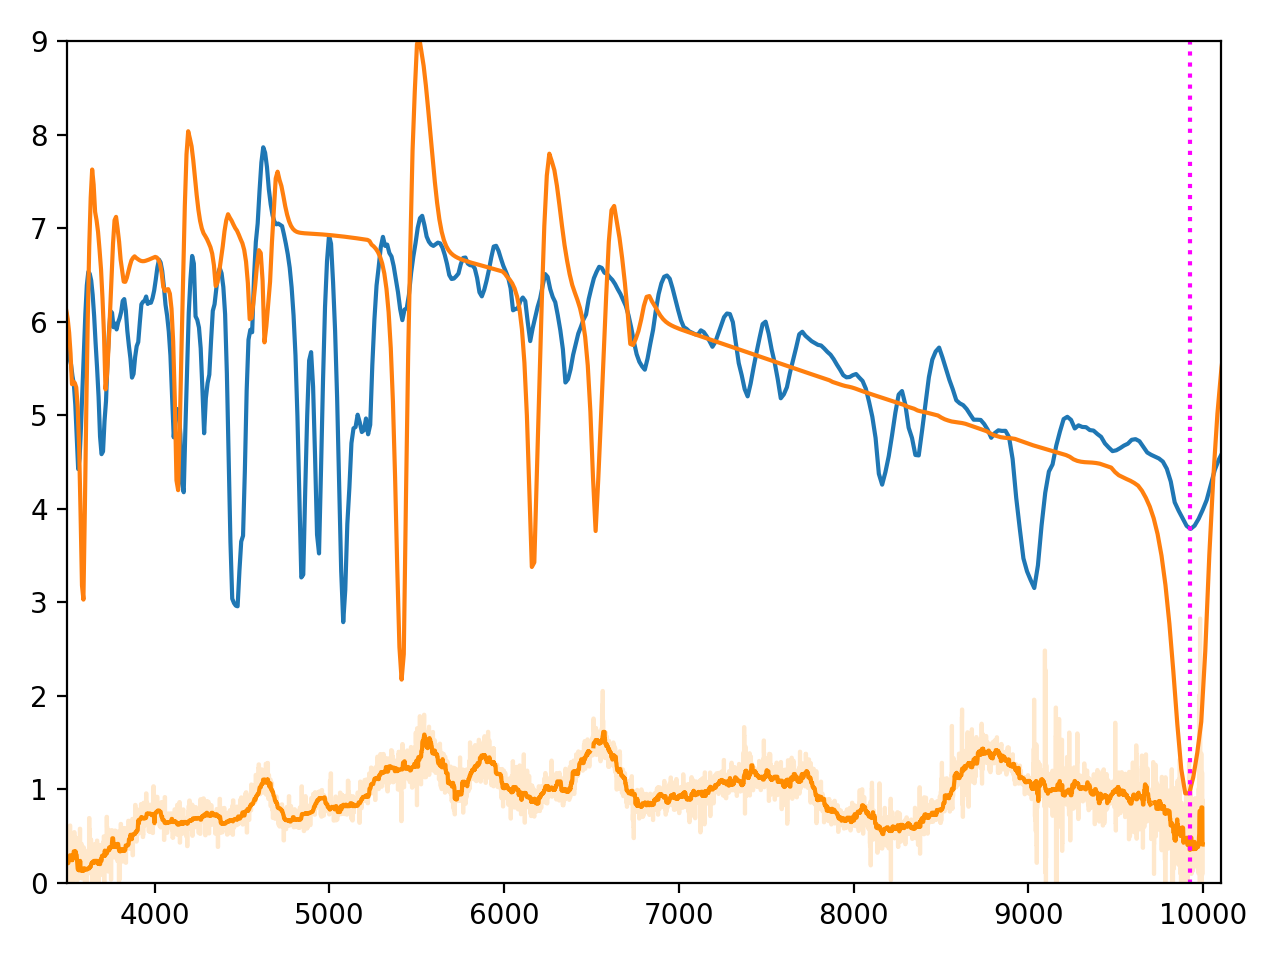

In [47]:
fig, ax = plt.subplots()

# Keck
wv, fl = plot_box_spec(keck_spec[0].values, keck_spec[1].values)
norm_flux = norm_flux = np.median(fl[np.where((wv > 9400) & (wv < 9600))])
ax.plot(wv/(1+z), fl/norm_flux, 
        alpha=0.2, color='DarkOrange')
ax.plot(wv/(1+z), 
        pd.Series(fl/norm_flux).rolling(35).median().values, 
        color='DarkOrange')

# Fe II spectrum
ax.plot(fe2_df[0].values, fe2_df[1].values)

# He I spectrum
ax.plot(he1_df[0].values/1.065, he1_df[1].values)


# He I 10830
ax.plot([10830*(1-25000/2.9979e5), 10830*(1-25000/2.9979e5)], 
        [-40,40.], ':', color='Magenta', label='He I @ 27 kkm/s')
# He I 18685
ax.plot([18685*(1-25000/2.9979e5), 18685*(1-25000/2.9979e5)], 
        [-40,40.], ':', color='Magenta', label='He I @ 27 kkm/s')
# He I 20581
ax.plot([20581*(1-25000/2.9979e5), 20581*(1-25000/2.9979e5)], 
        [-40,40.], ':', color='Magenta', label='He I @ 27 kkm/s')


ax.set_xlim(3500,10100)
ax.set_ylim(0,9)
fig.tight_layout()

In [18]:
fig, ax = plt.subplots()

# GNIRS
wv, fl = plot_box_spec(nir_spec['wave'].values, nir_spec['flux'].values)
Jband = np.where((wv < 23600) & (wv > 6000))
norm_flux = norm_flux = np.median(fl[np.where((wv > 9400) & (wv < 9600))])
ax.plot(wv[Jband]/(1+z), 
        fl[Jband]/norm_flux + 1.5, 
        alpha=0.2, color='DodgerBlue')
ax.plot(wv[Jband]/(1+z), 
        pd.Series(fl[Jband]/norm_flux).rolling(35, center=True).median().values + 1.5, 
        color='DodgerBlue')

# Fe II spectrum
ax.plot(fe2_df[0].values, fe2_df[1].values)

# He I spectrum
ax.plot(he1_df[0].values/1.065, he1_df[1].values)


# He I 10830
ax.plot([10830*(1-25000/2.9979e5), 10830*(1-25000/2.9979e5)], 
        [-40,40.], ':', color='Magenta', label='He I @ 27 kkm/s')
# He I 18685
ax.plot([18685*(1-25000/2.9979e5), 18685*(1-25000/2.9979e5)], 
        [-40,40.], ':', color='Magenta', label='He I @ 27 kkm/s')
# He I 20581
ax.plot([20581*(1-25000/2.9979e5), 20581*(1-25000/2.9979e5)], 
        [-40,40.], ':', color='Magenta', label='He I @ 27 kkm/s')


ax.set_xlim(8000,20000)
ax.set_ylim(1,6)
fig.tight_layout()

0       3004.51
1       3011.43
2       3018.38
3       3025.34
4       3032.31
         ...   
916    24770.80
917    24827.90
918    24885.10
919    24942.50
920    25000.00
Name: 0, Length: 921, dtype: float64

## Plot the spectrum in velocity space

<IPython.core.display.Javascript object>


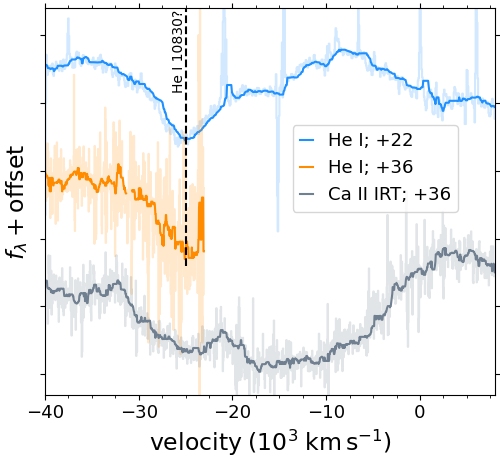

In [23]:
fig, ax = plt.subplots(figsize=(5,4.6))

# GNIRS
wv, fl = plot_box_spec(nir_spec['wave'].values, nir_spec['flux'].values)
Jband = np.where((wv < 23600) & (wv > 6000))
norm_flux = np.median(fl[np.where((wv > 9400) & (wv < 9600))])
ax.plot((wv[Jband]/(1+z) - 10830)/10830*c.to('km/s').value/1e3, 
        fl[Jband]/norm_flux + 0.9, 
        alpha=0.2, color='DodgerBlue')
ax.plot((wv[Jband]/(1+z) - 10830)/10830*c.to('km/s').value/1e3, 
        pd.Series(fl[Jband]/norm_flux).rolling(35).median().values + 0.9, 
        color='DodgerBlue', label='He I; +22')

# Keck
wv, fl = plot_box_spec(keck_spec[0].values, keck_spec[1].values)
norm_flux = norm_flux = np.median(fl[np.where((wv > 9400) & (wv < 9600))])
ax.plot((wv/(1+z) - 10830)/10830*c.to('km/s').value/1e3, 
        fl/norm_flux, 
        alpha=0.2, color='DarkOrange')
ax.plot((wv/(1+z) - 10830)/10830*c.to('km/s').value/1e3, 
        pd.Series(fl/norm_flux).rolling(35).median().values, 
        color='DarkOrange', label='He I; +36')


# Keck
wv, fl = plot_box_spec(keck_spec[0].values, keck_spec[1].values)
norm_flux = norm_flux = np.median(fl[np.where((wv > 9400) & (wv < 9600))])
ax.plot((wv/(1+z) - 8662.14)/8662.14*c.to('km/s').value/1e3, 
        fl/norm_flux - 1, 
        alpha=0.2, color='SlateGrey')
ax.plot((wv/(1+z) - 8662.14)/8662.14*c.to('km/s').value/1e3, 
        pd.Series(fl/norm_flux).rolling(35).median().values - 1, 
        color='SlateGrey', label='Ca II IRT; +36')



# # LM model
# wv, fl = plot_box_spec(lm_21dat[0].values, lm_21dat[1].values)
# norm_flux = np.median(fl[np.where((wv > 9400) & (wv < 9600))])
# ax.plot(wv, fl/norm_flux + 3., 
#         color='MediumAquaMarine')


ax.set_ylim(-0.65, 2.2)
ax.set_xlim(-4e1,8)
ax.set_ylabel(r'$f_\lambda + \mathrm{offset}$', fontsize=17)
ax.set_xlabel(r'$\mathrm{velocity\;(10^{3}\; km\,s^{-1})}$', fontsize=17)

ax.text(11500, 1.4, '20bjg; +22', color='DodgerBlue')
ax.text(11500, 0.3, '20bjg; +36', color='DarkOrange')

ax.text(11500, 2.6, '12fr; +23', color='0.4')
ax.text(11500, -1., '12fr; +40', color='0.4')

# ax.text(12000, 3.6, 'LM (B17); +7', color='MediumAquaMarine')

ax.set_yticklabels([])
ax.xaxis.set_minor_locator(MultipleLocator(2.5))
ax.tick_params(which='both', top=True,right=True, labelsize=13)

ax.vlines(-25, 0.3, 5, colors='k', linestyles='--', zorder=10)
ax.text(-25, 1.6, 'He I 10830?', ha='right',rotation=90)


ax.legend(loc=3,bbox_to_anchor=(0.53,0.45),
          fontsize=13, handlelength=0.75)
fig.subplots_adjust(left=0.09, right=0.99,top=0.98,bottom=0.14)
fig.savefig('SN2020jgb_NIR_velocities.pdf')